## **Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Defining a Bagging Classifier
----

Instantiate a Bagging classifier to predict liver disease.
Use the dataset features, which include Albumin, Age, and Gender among others.
Fit the Bagging classifier on `X_train` and `y_train`.
Prepare it for evaluation on the test set in later steps.


In [20]:
liver = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Indian liver\indian_liver_patient_preprocessed.csv")
liver.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [21]:
from sklearn.model_selection import train_test_split

X_lv = liver.drop('Liver_disease', axis =1).values
y_lv = liver['Liver_disease'].values


X_train, X_test, y_train, y_test = train_test_split(X_lv, y_lv, test_size = 0.3, random_state=1)

In [22]:
#1. Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#2. Instantiate a DecisionTreeClassifier called dt.
dt = DecisionTreeClassifier(random_state=1)

#3. Instantiate a BaggingClassifier called bc consisting of 50 trees.
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1)

Evaluating Bagging Performance
----

Train the Bagging classifier `bc` on `X_train` and `y_train`.
Predict the labels of `X_test` and store them.
Evaluate its performance by computing accuracy with `accuracy_score(y_test, y_pred)`.
Print the resulting test accuracy.


In [23]:
#1. Fit bc to the training set.
bc.fit(X_train, y_train)

#2. Predict the test set labels and assign the result to y_pred.
y_pred = bc.predict(X_test)

#3. Determine bc's test set accuracy.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Test score accuracy: {:.2f}'.format(accuracy))

Test score accuracy: 0.69


Preparing for Bagging Classifier Evaluation
----
Instantiate a bagging classifier with the parameter `oob_score=True`.
Fit the model on the training data (`X_train`, `y_train`).
After training, access the OOB accuracy using the `.oob_score_` attribute.
This value will later be compared with the test set accuracy.


In [24]:
#1. Import BaggingClassifier from sklearn.ensemble.
from sklearn.ensemble import BaggingClassifier

#2. Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.
dt1 = DecisionTreeClassifier(min_samples_leaf = 8, random_state = 1)

#3. Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.
bc1 = BaggingClassifier(estimator = dt1, n_estimators = 50, oob_score = True, random_state=1)

Comparing OOB Score and Test Set Accuracy
----
Fit the bagging classifier `bc` on the training data (`X_train`, `y_train`).
Predict labels for `X_test` and calculate test set accuracy using `accuracy_score()`.
Access the OOB accuracy using the `.oob_score_` attribute of `bc`.
Compare both values to evaluate model performance.


In [25]:
#1. Fit bc to the training set and predict the test set labels and assign the results to y_pred.
bc1.fit(X_train, y_train)
y_pred1 = bc1.predict(X_test)

#2. Evaluate the test set accuracy acc_test1 by calling accuracy_score.
acc_test1 = accuracy_score(y_test, y_pred1)

#3. Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.
acc_oob = bc1.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test1, acc_oob))

Test set accuracy: 0.695, OOB accuracy: 0.677


Task: Training a Random Forest Regressor
----
Define a random forest regressor model to predict bike rental demand.
Fit the model on the training data (`X_train`, `y_train`).
The model will learn patterns from the historical weather data to make predictions on bike sharing demand.

In [26]:
#Importing relevant dataset
bikes = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\bikes.csv")
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [27]:
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [28]:
#1. Import RandomForestRegressor from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

#2. Instantiate a RandomForestRegressor called rf consisting of 25 trees.
rf = RandomForestRegressor(n_estimators = 25, random_state=1)

#3. Fit rf to the training set.
rf.fit(X_train, y_train)

,n_estimators,25
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluating Random Forest Regressor Performance
----
Use the trained random forest regressor `rf` to make predictions on the test set (`X_test`).
Compute the Mean Squared Error (MSE) between the predictions and actual values (`y_test`) using `mean_squared_error`.
Take the square root of the MSE to obtain the RMSE, which represents the average prediction error of the model on the test data.

In [29]:
#1. Import mean_squared_error from sklearn.metrics as MSE.
from sklearn.metrics import mean_squared_error as MSE

#2. Predict the test set labels and assign the result to y_pred.
y_pred_rf = rf.predict(X_test)

#3. Compute the test set RMSE and assign it to rmse_test.
rmse_test = MSE(y_test, y_pred_rf) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 52.38


Task: Visualizing Feature Importances
----
Extract the feature importances from the trained random forest regressor `rf`.
Create a pandas Series called `importances` with feature names as index and their importance values.
Generate a horizontal bar plot using the pandas plotting capabilities to visualize which features were most predictive.
Display the plot to identify the most important features for the model's predictions.

In [30]:
# Create a pandas Series with feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

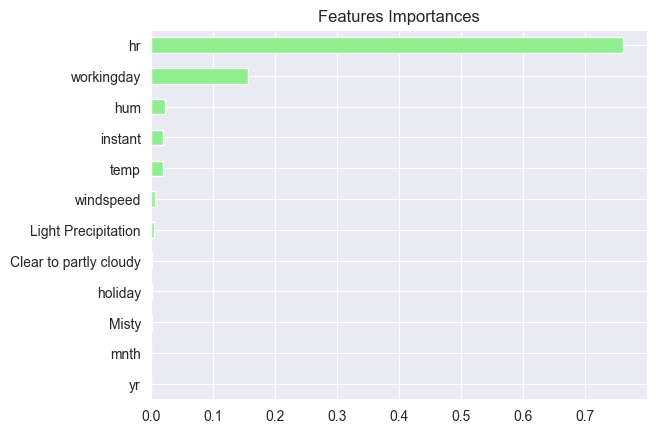

In [34]:
#1. Call the .sort_values() method on importances and assign the result to importances_sorted
importances_sorted = importances.sort_values()

#2. Call the .plot() method on importances_sorted and set the arguments:kind to 'barh', color to 'lightgreen'.
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()